In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import tracpy
import tracpy.calcs
from tracpy.tracpy_class import Tracpy
import os
import numpy as np
import cartopy.crs as ccrs
import xarray as xr
from glob import glob
import netCDF4 as netCDF
import cmocean.cm as cmo
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.patches as patches


In [5]:
dfpa = pd.read_csv('data/PortAransas_concentrations_Nov_01_2017.csv', index_col=0, parse_dates=True)
dfss = pd.read_csv('data/Surfside_concentrations_Nov_01_2017.csv', index_col=0, parse_dates=True)

In [12]:
dfpa.columns

Index(['Acantharian', 'Akashiwo', 'Asterionellopsis', 'Beads', 'Brachidinium',
       'Centric', 'Ceratium', 'Ch_simplex', 'Chaetoceros', 'Chattonella',
       'Cylindrotheca', 'Cymatosira', 'DactFragCeratul', 'Dictyocha',
       'Dino_MIX', 'Dinophysis', 'Ditylum', 'Ebria', 'Eucampia',
       'Eucampiacornuta', 'Guinardia', 'Hemiaulus', 'Heterosigma', 'Hypotrich',
       'Karenia', 'Laboea', 'Leptocylindrus', 'Myrionectarubra', 'P_minimum',
       'P_texanum', 'Phaeopolykrikos', 'Pleurosigma', 'Prorocentrum',
       'Pseudonitzschia', 'Pyramimonas', 'Rhizosolenia', 'RoundCell',
       'Skeletonema', 'Strom_Strob_Mix', 'Strom_pulchrum', 'Strombidinopsis',
       'Thalassionema', 'Thalassiosira', 'Tin_aggl', 'Tin_hyal', 'Tontonia',
       'Warnowia', 'centric10', 'ciliate_small', 'detritus', 'flagellate_MIX',
       'haptophyte', 'pennate', 'unclassified'],
      dtype='object')

In [13]:
cols = ['Asterionellopsis', 'Chaetoceros', 'DactFragCeratul', 'Skeletonema', 'Thalassionema']

Text(0.5,1,'Surfside')

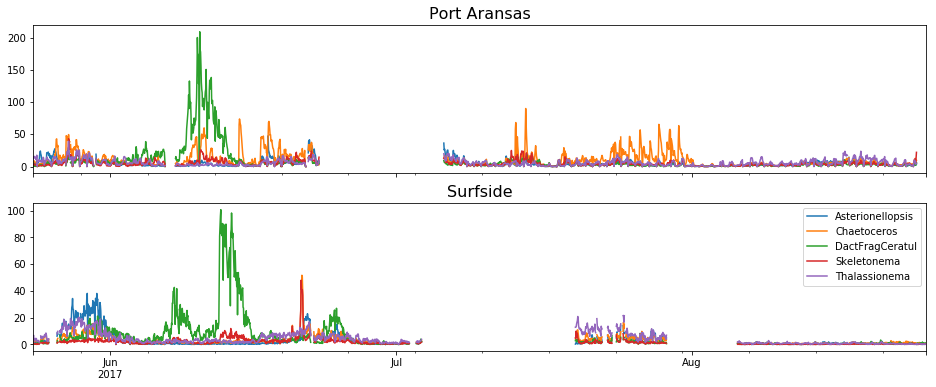

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(16,6), sharex=True)
# ax1 = fig.add_subplot(211)
ax1 = axes[0]
dfpa[cols]['2017-5-1':].plot(ax=ax1, legend=False)
ax1.set_title('Port Aransas', fontsize=16)

# ax2 = fig.add_subplot(212)
ax2=axes[1]
dfss[cols]['2017-5-1':].plot(ax=ax2, legend=True)
ax2.set_title('Surfside', fontsize=16)

In [9]:
dfpa

,Acantharian,Akashiwo,Asterionellopsis,Beads,Brachidinium,Centric,Ceratium,Ch_simplex,Chaetoceros,Chattonella,...,Tin_hyal,Tontonia,Warnowia,centric10,ciliate_small,detritus,flagellate_MIX,haptophyte,pennate,unclassified
2017-05-01 00:00:00,0.287582,0.718956,1.509807,4.026151,0.431373,1.006538,0.143791,0.575164,2.372553,0.000000,...,0.215687,0.790851,0.143791,12.150348,9.418317,19.627486,25.235339,1.078433,4.313733,0.0
2017-05-01 01:00:00,0.068601,0.205804,0.411608,1.989441,0.274406,0.617413,0.068601,0.343007,1.166224,0.068601,...,0.000000,0.137203,0.137203,3.978882,4.664896,7.957764,9.123988,0.548811,1.577832,0.0
2017-05-01 02:00:00,0.102210,0.102210,0.408841,1.533153,0.408841,0.817682,0.102210,0.000000,0.408841,0.102210,...,0.102210,0.817682,0.306631,2.759676,4.088409,6.132614,5.110512,0.204420,0.919892,0.0
2017-05-01 03:00:00,0.067813,0.000000,0.203439,0.813757,0.203439,0.135626,0.000000,0.000000,0.542505,0.000000,...,0.000000,0.406879,0.135626,2.305645,2.576897,5.085982,5.628486,0.203439,0.949383,0.0
2017-05-01 04:00:00,0.000000,0.000000,0.714466,0.408266,0.204133,0.102067,0.000000,0.306200,0.816533,0.000000,...,0.102067,0.408266,0.204133,2.551665,5.409529,7.552928,3.776464,0.408266,0.612400,0.0
2017-05-01 05:00:00,0.102570,0.000000,0.410278,1.641112,0.102570,0.000000,0.000000,0.205139,1.230834,0.000000,...,0.000000,0.410278,0.205139,3.487363,8.000422,13.026328,5.538754,0.307709,0.615417,0.0
2017-05-01 06:00:00,0.306338,0.000000,0.102113,0.816901,0.000000,0.408450,0.000000,0.306338,0.714788,0.000000,...,0.000000,0.510563,0.102113,2.348590,3.982391,8.985909,5.411968,0.306338,1.327464,0.0
2017-05-01 07:00:00,0.206174,0.000000,1.133959,1.237046,0.206174,0.103087,0.000000,0.412349,1.546308,0.000000,...,0.000000,0.721610,0.103087,6.494492,6.288318,12.576636,7.731538,0.515436,1.546308,0.0
2017-05-01 08:00:00,0.421489,0.105372,1.159095,0.737606,0.842978,0.421489,0.000000,0.948351,3.266541,0.000000,...,0.105372,1.159095,0.210745,8.008295,10.958719,26.869936,15.595100,1.475212,2.002074,0.0
2017-05-01 09:00:00,0.101349,0.000000,0.405397,0.202698,0.000000,0.202698,0.000000,0.101349,0.304047,0.000000,...,0.000000,0.304047,0.101349,2.533728,3.243172,5.270155,3.040474,0.506746,1.114840,0.0
